In [1]:

from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [2]:
# load data and arrange into Pandas dataframe
df = read_csv("housing.csv", delim_whitespace=True, header=None)

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


df.columns = feature_names
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [3]:
df = df.rename(columns={'MEDV': 'PRICE'})
print(df.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [4]:

#Split into features and target (Price)
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


In [6]:
#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [7]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(128, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)


Epoch 1/100
11/11 [==============================] - 1s 17ms/step - loss: 547.5498 - mae: 21.5081 - val_loss: 556.6695 - val_mae: 21.5775
Epoch 2/100
11/11 [==============================] - 0s 5ms/step - loss: 472.1275 - mae: 19.7385 - val_loss: 458.7081 - val_mae: 19.3264
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 373.3336 - mae: 17.1332 - val_loss: 328.0822 - val_mae: 15.9337
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 250.2001 - mae: 13.5558 - val_loss: 184.2664 - val_mae: 11.5110
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 133.7347 - mae: 9.2293 - val_loss: 76.5511 - val_mae: 7.1369
Epoch 6/100
11/11 [==============================] - 0s 4ms/step - loss: 70.6835 - mae: 6.1794 - val_loss: 39.3755 - val_mae: 5.0357
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 50.9395 - mae: 5.2739 - val_loss: 28.7233 - val_mae: 4.3365
Epoch 8/100
11/11 [==============================] 

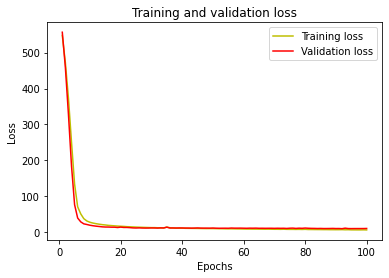

In [10]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])

1/1 [==============================] - 0s 68ms/step
Predicted values are:  [[18.51675 ]
 [20.575607]
 [21.435455]
 [20.61901 ]
 [12.646675]]
Real values are:  498    21.2
94     20.6
150    21.5
221    21.7
423    13.4
Name: PRICE, dtype: float64
